In [22]:
import torch
import numpy as np
import pandas
from tqdm import trange
import matplotlib.pyplot as plt
import math

In [23]:
path_x_1="./drive/MyDrive/ml/lab6/ex5Linx.dat"
path_y_1="./drive/MyDrive/ml/lab6/ex5Liny.dat"

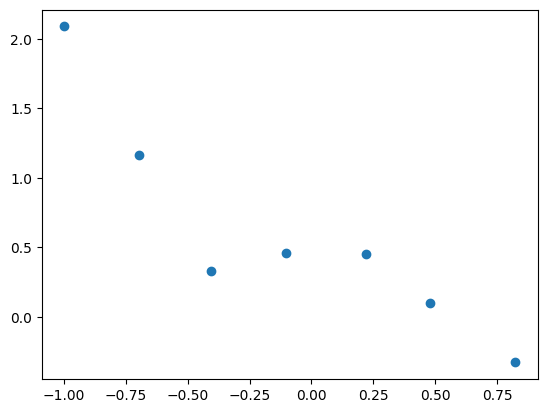

In [24]:
input_x_1=[]
data_x_1=[]
data_y_1=[]
input_y_1=[]
with open(path_x_1,'r')as f:
  for line in f:
    linshi=[]
    linshi.append(1)
    linshi.append(float(line))
    linshi.append(float(line)**2)
    linshi.append(float(line)**3)
    linshi.append(float(line)**4)
    linshi.append(float(line)**5)
    data_x_1.append(float(line))
    input_x_1.append(linshi)
with open(path_y_1,'r')as f:
  for line in f:
    now=float(line)
    data_y_1.append(now)
    input_y_1.append(now)
input_x_1=np.array(input_x_1)
input_y_1=np.array(input_y_1)
input_y_1=input_y_1.reshape(input_y_1.shape[0],1)
plt.scatter(data_x_1,data_y_1)
plt.show()

In [25]:
def get_ans(a,x):
  ans=0
  for i in range(a.shape[0]):
    ans=ans+a[i][0]*(x**i)
  return ans

In [26]:
def norm_2_linear(lbda):
  I=np.eye(6)
  I[0][0]=0
  theta=np.linalg.inv((input_x_1.transpose()@input_x_1+lbda*I))@input_x_1.transpose()@input_y_1
  print(theta.shape)
  ans_x_1=[]
  ans_y_1=[]
  for i in np.arange(-1.5,1,0.01):
    ans_x_1.append(i)
    ans_y_1.append(get_ans(theta,i))
  plt.plot(ans_x_1,ans_y_1)
  plt.scatter(data_x_1,data_y_1)
  plt.show()

(6, 1)


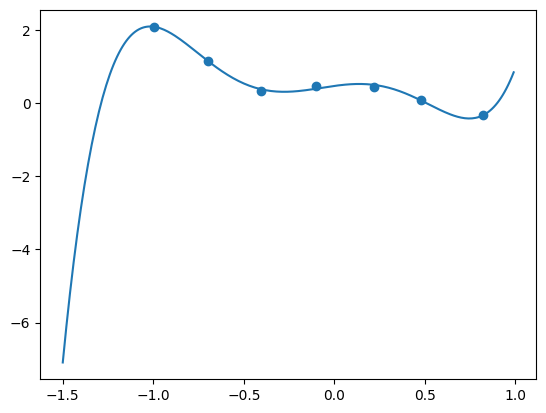

In [27]:
norm_2_linear(0)

(6, 1)


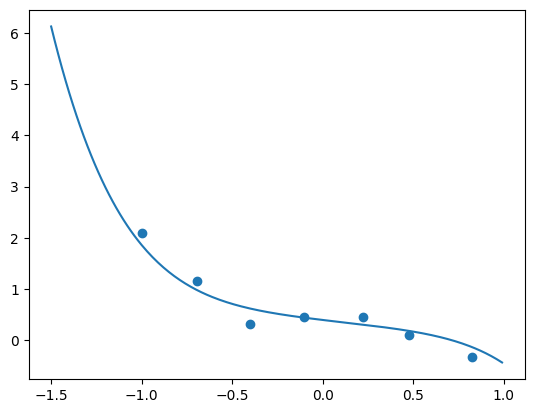

In [28]:
norm_2_linear(1)

(6, 1)


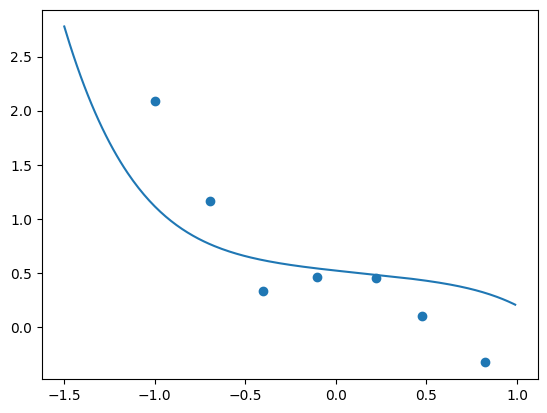

In [29]:
norm_2_linear(10)

In [30]:
path_x_2="./drive/MyDrive/ml/lab6/ex5Logx.dat"
path_y_2="./drive/MyDrive/ml/lab6/ex5Logy.dat"

(117, 29)


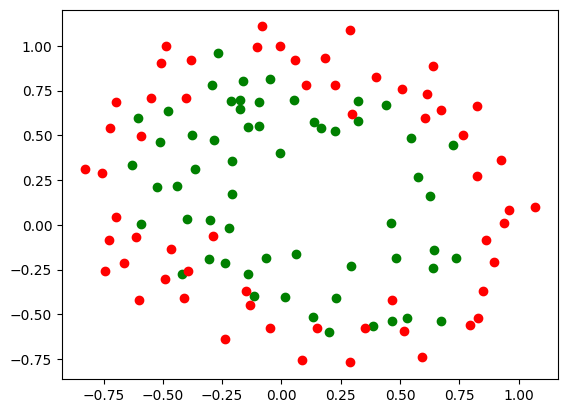

In [32]:
input_x_2=[]
data_x_2=[]
data_y_2=[]
input_y_2=[]
with open(path_x_2,'r')as f:
  for line in f:
    linshi=[]
    line=line.replace('\n','')
    line=line.split(',')
    line[0]=float(line[0])
    line[1]=float(line[1])
    linshi.append(1)
    for i in range(7):
      for j in range(i+1):
          linshi.append((line[0]**j)*(line[1]**(i-j)))
    data_x_2.append(line)
    input_x_2.append(linshi)
with open(path_y_2,'r')as f:
  for line in f:
    now=float(line)
    data_y_2.append(now)
    input_y_2.append(now)
input_x_2=np.array(input_x_2)
input_y_2=np.array(input_y_2)
input_y_2=input_y_2.reshape(input_y_2.shape[0],1)
print(input_x_2.shape)
for i in range(len(data_x_2)):
  if data_y_2[i]==0:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='r')
  else:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='g')
plt.show()

In [120]:
step=1000
def loss(theta,input,output,lbda):
  ans=input@theta
  ans=1/(1+np.exp(-ans))
  #print(ans)
  ret=np.zeros((theta.shape[0],1))
  for i in range(theta.shape[0]):
    for j in range(ans.shape[0]):
      ret[i][0]=ret[i][0]+(ans[j][0]-output[j][0])*input[j][i]
    ret[i][0]=ret[i][0]/theta.shape[0]
    if i!=0:
      ret[i][0]=ret[i][0]+lbda/input.shape[0]*theta[i][0]
  return ret
def Hissen(theta,input,lbda):
  ans=input@theta
  ans=1/(1+np.exp(-ans))
  H=np.eye(input.shape[1],input.shape[1])
  H[0][0]=0
  H=lbda*H
  for i in range(input.shape[0]):
    now=input[i]
    now=now.reshape(1,input.shape[1])
    #print(now.shape)
    H=H+((ans[i][0])*(1-ans[i][0]))*(now.transpose()@now)
  H=H/input.shape[0]
  return H
def norm_2_log(lbda):
  theta=np.random.rand(29,1)
  for i in trange(1000):
    #print(Hissen(theta,input_x_2,lbda))
    #print(loss(theta,input_x_2,input_y_2,lbda))
    theta=theta-0.01*np.linalg.pinv(Hissen(theta,input_x_2,lbda))@loss(theta,input_x_2,input_y_2,lbda)
    #theta=theta-0.01*loss(theta,input_x_2,input_y_2,lbda)
  return theta

100%|██████████| 1000/1000 [00:09<00:00, 106.34it/s]


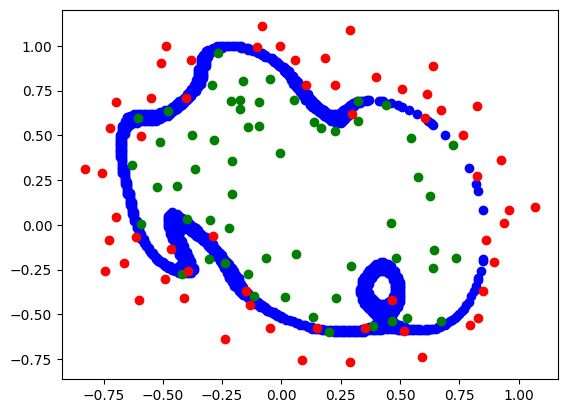

In [121]:
theta=norm_2_log(0)
bound_x=[]
bound_y=[]
for i in np.arange(-2,2,0.01):
  for j in np.arange(-2,2,0.01):
    linshi=[]
    linshi.append(1)
    for k in range(7):
      for l in range(k+1):
          linshi.append((i**l)*(j**(k-l)))
    now=np.array(linshi)
    now=now.reshape(1,29)
    ans=now@theta
    if math.fabs(ans[0][0]-0)<0.5:
      bound_x.append(i)
      bound_y.append(j)
plt.scatter(bound_x,bound_y,c='b')
for i in range(len(data_x_2)):
  if data_y_2[i]==0:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='r')
  else:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='g')
plt.show()

100%|██████████| 1000/1000 [00:10<00:00, 94.63it/s]


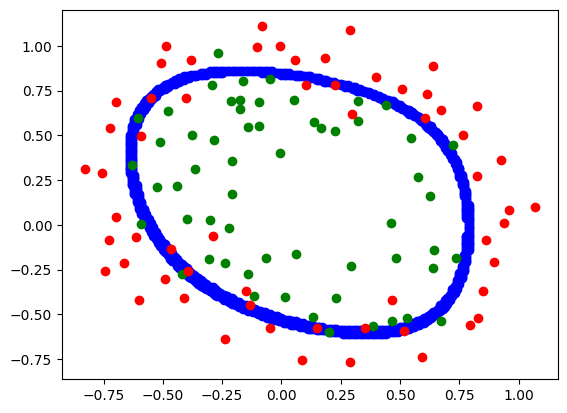

In [124]:
theta=norm_2_log(1)
bound_x=[]
bound_y=[]
for i in np.arange(-2,2,0.01):
  for j in np.arange(-2,2,0.01):
    linshi=[]
    linshi.append(1)
    for k in range(7):
      for l in range(k+1):
          linshi.append((i**l)*(j**(k-l)))
    now=np.array(linshi)
    now=now.reshape(1,29)
    ans=now@theta
    if math.fabs(ans[0][0]-0)<0.1:
      bound_x.append(i)
      bound_y.append(j)
plt.scatter(bound_x,bound_y,c='b')
for i in range(len(data_x_2)):
  if data_y_2[i]==0:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='r')
  else:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='g')
plt.show()

100%|██████████| 1000/1000 [00:10<00:00, 95.88it/s]


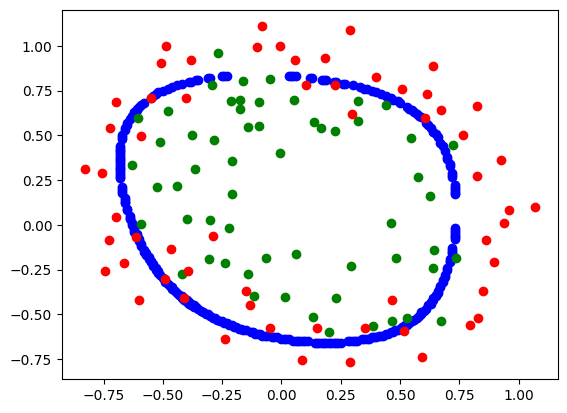

In [125]:
theta=norm_2_log(10)
bound_x=[]
bound_y=[]
for i in np.arange(-2,2,0.01):
  for j in np.arange(-2,2,0.01):
    linshi=[]
    linshi.append(1)
    for k in range(7):
      for l in range(k+1):
          linshi.append((i**l)*(j**(k-l)))
    now=np.array(linshi)
    now=now.reshape(1,29)
    ans=now@theta
    if math.fabs(ans[0][0]-0)<0.01:
      bound_x.append(i)
      bound_y.append(j)
plt.scatter(bound_x,bound_y,c='b')
for i in range(len(data_x_2)):
  if data_y_2[i]==0:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='r')
  else:
    plt.scatter(data_x_2[i][0],data_x_2[i][1],c='g')
plt.show()